# Analysis of custom filters

## Aim of this notebook

Analyzing the pre-filtered fragment library, the reduced fragment library and the custom filtered fragment library.


## Table of contents
1. Load the fragment libraries

    1.1. Load fragment library pre-filtered
    
    1.2. Load fragment library reduced
    
    1.3. Load fragment library custom filtered
    
    1.4. Check which fragments from are contained in the subsets
    

2. t-SNE plots
    
    2.1. Comparing fragment library sets
    * Fragment library pre-filtered vs. fragment library reduced
    * Fragment library pre-filtered vs. fragment library custom filtered
    * Fragment library pre-filtered vs. fragment library reduced vs. custom filtered
    
    
    2.2. Comparing single custom filtering steps



3. Most common fragments per library subset

    3.1. Fragment library pre-filtered

    3.2. Fragment library reduced
    
    3.3. Fragment library custom filtered

    3.4. Compare cluster sizes for all subsets



4. Connection frequency between subpockets

    4.1. Fragment library pre-filtered
    
    4.2. Fragment library reduced
    
    4.3. Fragment library custom filtered
    

5. Fragment similarity per subpocket


6. Fragment properties
    
    6.1. Per subpocket for each set
    
    6.2. Per custom filter

7. Development of number of fragments per subpocket during custom filtering

## Imports and preprocessing

In [1]:
from pathlib import Path

import pandas as pd
from rdkit.Chem import PandasTools

from kinfraglib import filters, utils

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

### Define global paths

In [4]:
# Path to data
HERE = Path().resolve()
PATH_DATA = HERE / "../../data"
PATH_DATA_CUSTOM = PATH_DATA / "fragment_library_custom_filtered"

## 1. Load the fragment libraries
*  1.1. Load fragment library pre-filtered
*  1.2. Load fragment library reduced
*  1.3. Load fragment library custom filtered
*  1.4. Check which fragments from are contained in the subsets

- **Pre-filtered fragment library:** Fragment library without duplicates, unfragmented ligands, fragments only connecting to pool X and fragments in pool X. `fragment_library`
- **Reduced fragment library:** Pre-filtered fragment library, without AP fragments which are not hinge like and chose a diverse subset using Butina Clustering. `fragment_library_reduced`
- **Custom fragment library:** Pre-filtered fragment library excluding fragments filtered out by unwanted substructures, drug likeness, synthesizability and pairwise retrosynthesizability. `fragment_library_custom_filtered`

### 1.1. Load fragment library pre-filtered
Fragment library without duplicates, unfragmented ligands, fragments only connecting to pool X and fragments in pool X.

In [5]:
fragment_library_orig = utils.read_fragment_library(PATH_DATA / "fragment_library")
fragment_library = filters.prefilters.pre_filters(fragment_library_orig)
pd.concat(fragment_library).shape

(2862, 18)

,subpocket,smiles,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles_dummy,fragment_count,connections,connections_name
0,AP,Nc1c[nH]c2ncccc12,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,[11*]c1cnc2[nH]cc(N[27*])c2c1,3,"[FP, SE]","[AP=FP, AP=SE]"
1,AP,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,3,"[SE, GA]","[AP=SE, AP=GA]"
2,AP,Cc1cc(N)[nH]n1,,,,ABL1,Abl,TK,2f4j,VX6,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,[22*]Nc1cc(C)n[nH]1,9,[SE],[AP=SE]

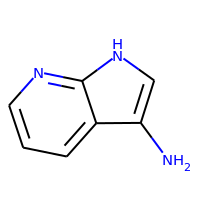
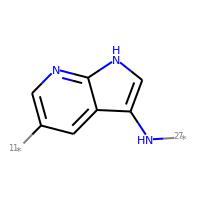
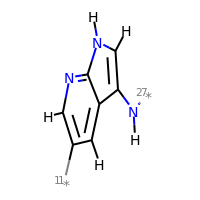
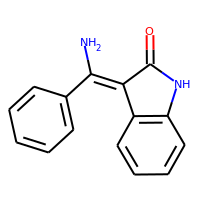
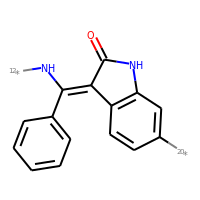
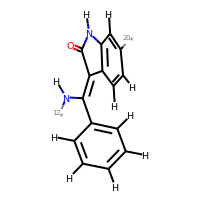
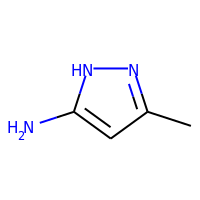
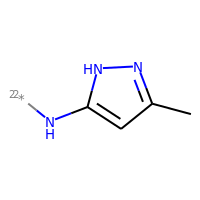
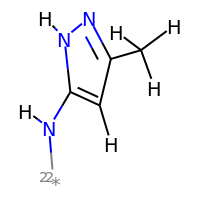

In [6]:
fragment_library['AP'].head(3)

### 1.2. Load fragment library reduced
Pre-filtered fragment library, without AP fragments which are not hinge like and chose a diverse subset using Butina Clustering.

In [7]:
fragment_library_reduced = utils.read_fragment_library(PATH_DATA / "fragment_library_reduced")
pd.concat(fragment_library_reduced).shape

(624, 15)

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,AKT2,Akt,AGC,3e87,G95,B,B,AP AP AP AP AP AP AP AP AP AP AP AP AP AP FP,16 16 16 16 16 16 16 16 16 16 16 16 16 16 na,c1cnc2[nH]ccc2c1,*c1ccnc2[nH]ccc12,AP
1,,,,AKT1,Akt,AGC,3ocb,XM1,,B,AP AP AP AP AP AP AP AP AP AP AP AP AP FP,14 14 14 14 14 14 14 14 14 14 14 14 14 na,c1ncc2cc[nH]c2n1,*c1ncnc2[nH]ccc12,AP
2,,,,JAK1,JakA,TK,4e4l,0NH,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 na,c1cc2c(ncc3nc[nH]c32)[nH]1,*n1cnc2cnc3[nH]ccc3c21,AP

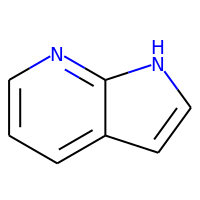
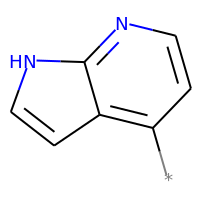
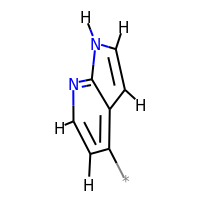
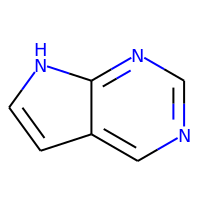
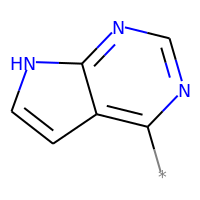
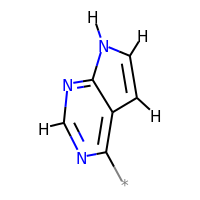
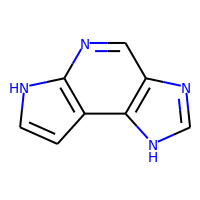
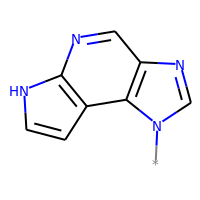
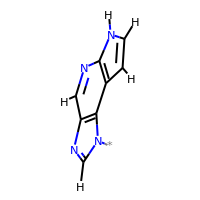

In [8]:
fragment_library_reduced['AP'].head(3)

### 1.3. Load fragment library custom filtered
Pre-filtered fragment library excluding fragments filtered out by unwanted substructures, drug likeness, synthesizability and pairwise retrosynthesizability.

In [9]:
fragment_library_custom = utils.read_fragment_library(PATH_DATA / "fragment_library_custom_filtered")
pd.concat(fragment_library_custom).shape

(388, 15)

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,ACTR2,STKR,TKL,3q4t,TAK,A,B,AP AP AP AP AP AP AP AP AP AP AP AP SE GA,16 16 16 16 16 16 16 16 16 16 16 16 na na,c1cnc2ccnn2c1,*c1cnc2c(*)cnn2c1,AP
1,,,,ACTR2,STKR,TKL,3soc,GVD,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,15 15 15 15 15 15 15 15 14 14 14 14 14 14 14 5...,Nc1cc(C2CC2)[nH]n1,*Nc1cc(C2CC2)[nH]n1,AP
2,,,,AKT1,Akt,AGC,3mv5,XFE,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,16 16 16 16 16 16 16 16 16 16 16 16 8 8 8 8 na,Cc1c[nH]c2ncncc12,*c1ncnc2[nH]cc(C)c12,AP

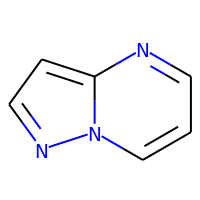
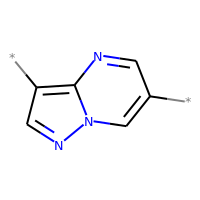
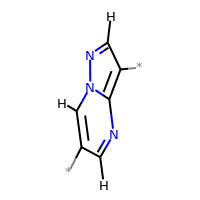
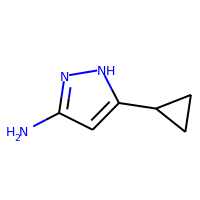
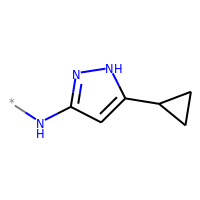
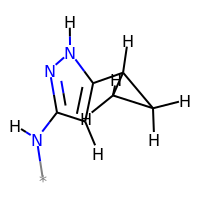
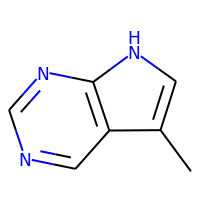
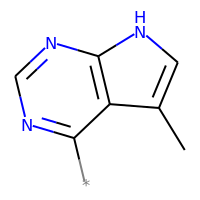
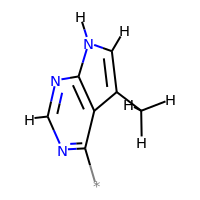

In [10]:
fragment_library_custom['AP'].head(3)

### 1.4. Check which fragments from are contained in the subsets

In [11]:
fragment_library = filters.analysis.frag_in_subset(fragment_library, fragment_library_reduced, colname = "bool_reduced")

In [12]:
fragment_library = filters.analysis.frag_in_subset(fragment_library, fragment_library_custom, colname = "bool_custom")

,subpocket,smiles,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles_dummy,fragment_count,connections,connections_name,bool_reduced,bool_custom
0,AP,Nc1c[nH]c2ncccc12,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,[11*]c1cnc2[nH]cc(N[27*])c2c1,3,"[FP, SE]","[AP=FP, AP=SE]",0,0
1,AP,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,3,"[SE, GA]","[AP=SE, AP=GA]",0,0
2,AP,Cc1cc(N)[nH]n1,,,,ABL1,Abl,TK,2f4j,VX6,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,[22*]Nc1cc(C)n[nH]1,9,[SE],[AP=SE],1,0

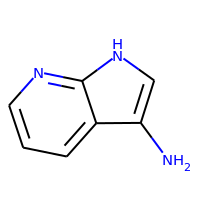
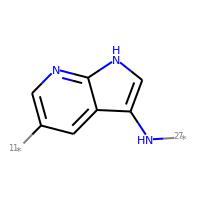
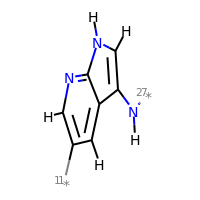
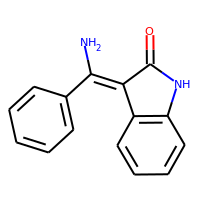
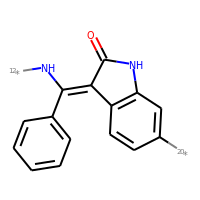
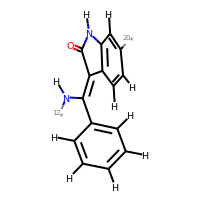
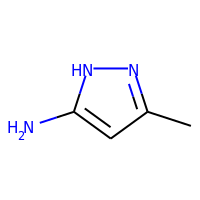
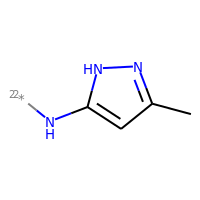
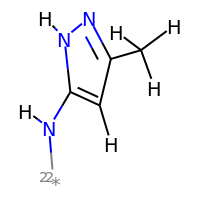

In [13]:
fragment_library["AP"].head(3)

## 2. t-SNE plots
* 2.1. Comparing fragment library sets
        - Fragment library pre-filtered vs. fragment library reduced
        - Fragment library pre-filtered vs. fragment library custom filtered
        - Fragment library pre-filtered vs. fragment library reduced vs. custom filtered
    
* 2.2. Comparing single custom filtering steps

T-Distributed Stochastic Neighbor Embedding (t-SNE) plots can be used to visualize high dimensional data in a low dimensional space, showing clusters. 

We will use them to compare the included and excluded fragments in the fragment libraries and the filtering steps

### 2.1. Comparing fragment library sets

/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


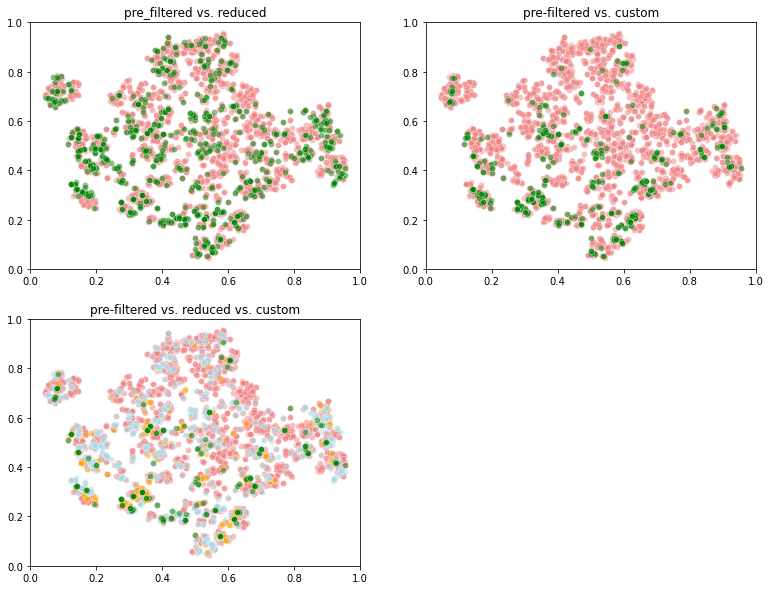

2862 Pre-filtered fragments.
        Number of fragments excluded in both datasets: 1859
        Number of fragments excluded in the reduced dataset but included in the custom dataset: 226
        Number of fragments excluded in the custom dataset but included in the reduced dataset: 605
        Number of fragments in both datasets: 172 


In [14]:
filters.plots.create_tsne_plots(fragment_library)

### 2.2 Comparing single custom filtering steps

Read in file where single filtering step results are saved

In [15]:
saved_filter_results = pd.read_csv(PATH_DATA_CUSTOM / "custom_filter_results.csv")
saved_filter_results.head()

,smiles,subpocket,bool_pains,bool_brenk,bool_ro3,bool_qed,qed,bool_bb,bool_syba,syba,retro_count,bool_retro
0,Nc1c[nH]c2ncccc12,AP,1,1,1,1,0.565900,1,1,30.950959,0.0,0.0
1,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,AP,1,0,1,1,0.747185,0,1,17.682659,NaN,NaN
2,Cc1cc(N)[nH]n1,AP,1,1,1,0,0.488854,1,1,15.727015,NaN,NaN
3,Nc1ncc(C=O)s1,AP,1,0,1,1,0.561340,1,1,12.789242,NaN,NaN
4,COCC(=O)n1cc2[nH]nc(NC=O)c2c1,AP,1,0,0,1,0.723961,0,1,14.653939,NaN,NaN


/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


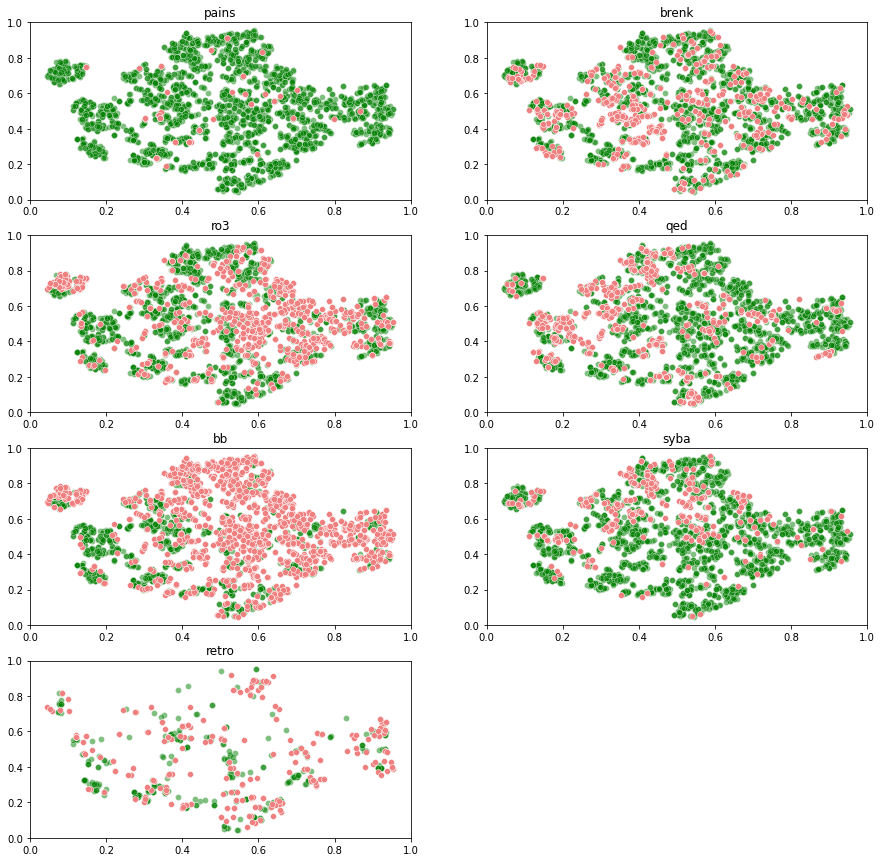

In [16]:
filters.plots.create_tsne_plots_filters(fragment_library, saved_filter_results)

## 3. Most common fragments per library subset
* 3.1. Fragment library pre-filtered
* 3.2. Fragment library reduced
* 3.3. Fragment library custom filtered
* 3.4. Compare cluster sizes for all subsets

In [17]:
subpocket = "all"

### 3.1. Fragment library pre-filtered

In [18]:
most_common_fragments = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library, subpocket)

Number of molecules: 88
Threshold:  0.6
Number of clusters:  39
# Clusters with only 1 molecule:  23
# Clusters with more than 5 molecules:  5
# Clusters with more than 25 molecules:  0
# Clusters with more than 100 molecules:  0


Legend: cluster ID | fragment count


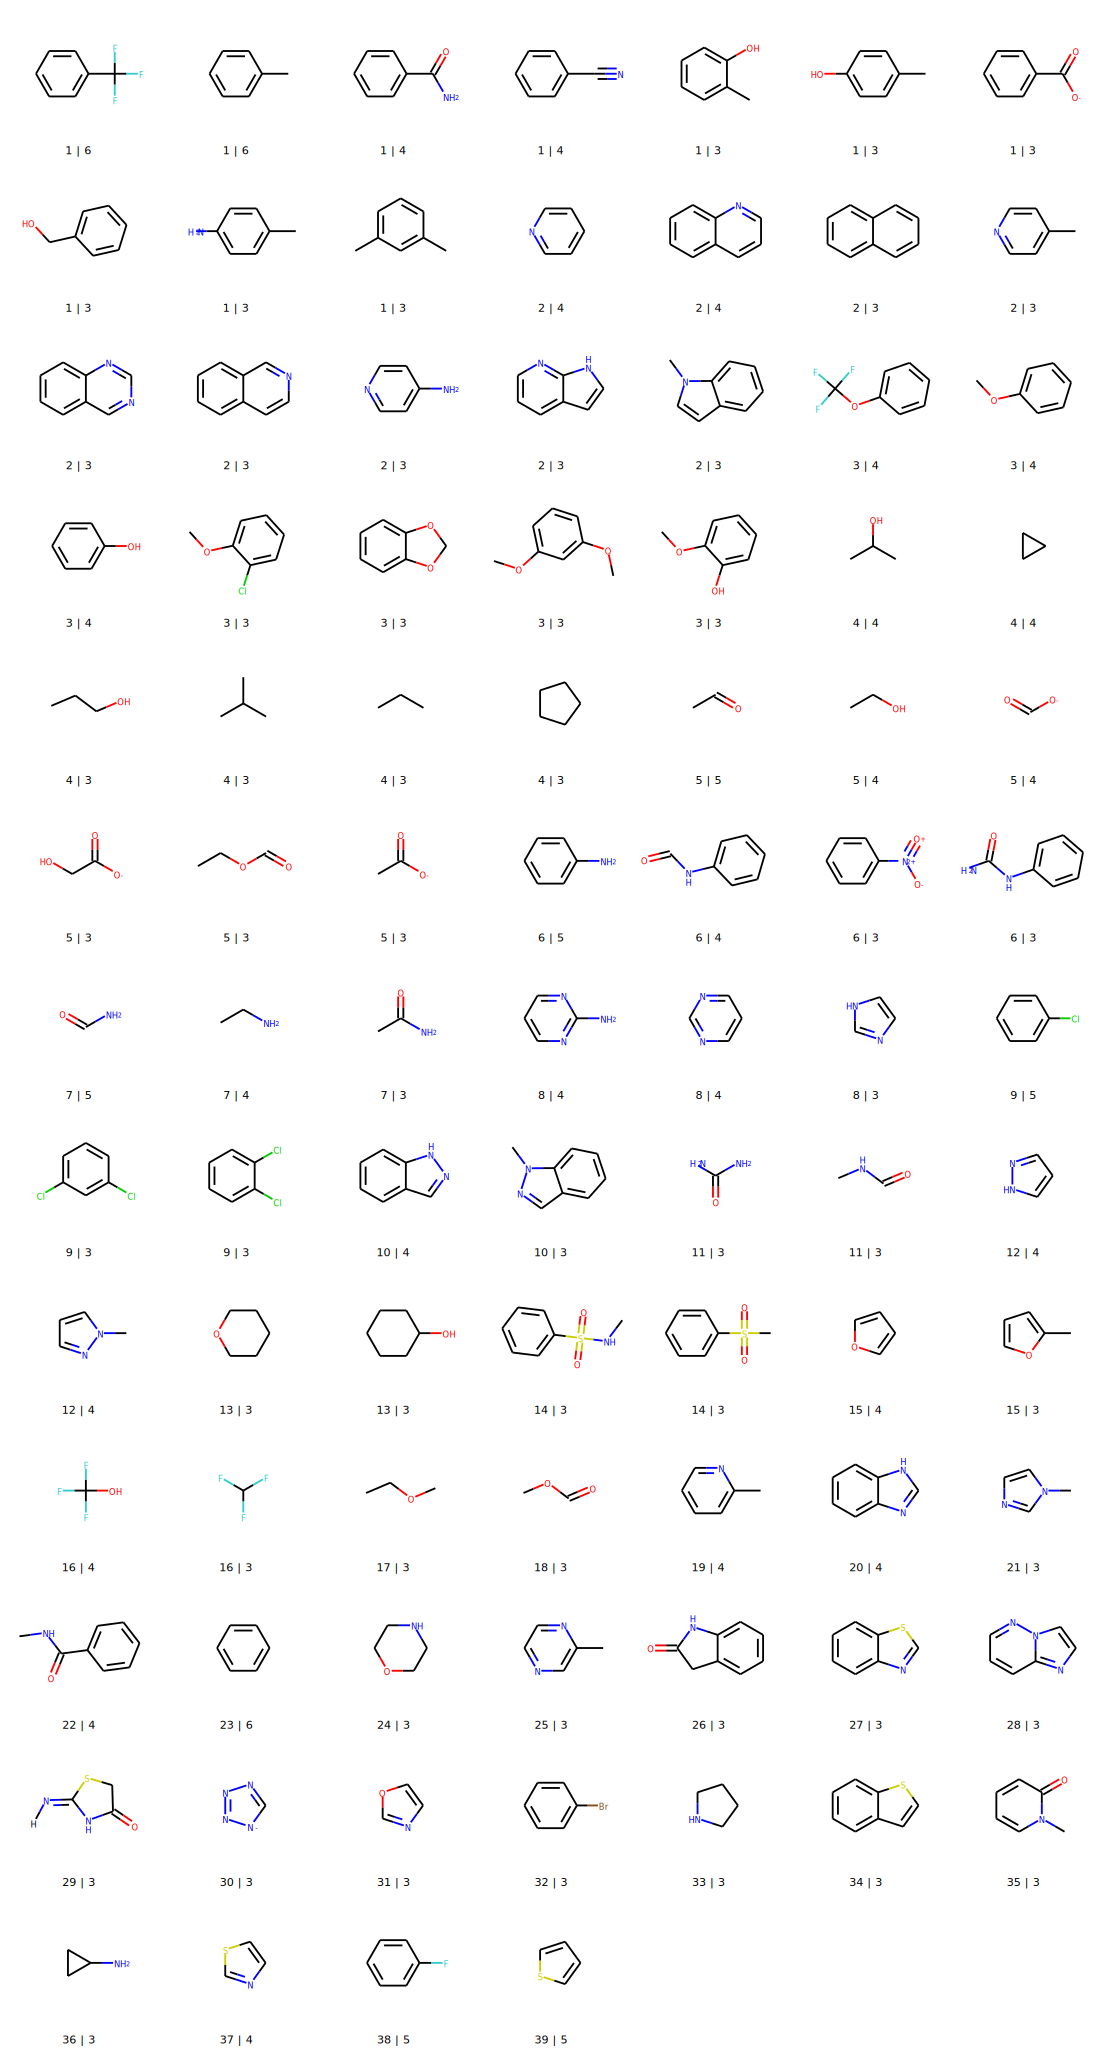

In [19]:
filters.pipeline_analysis.draw_clusters(most_common_fragments, subpocket, None)

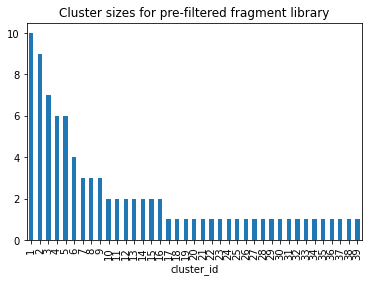

In [20]:
filters.pipeline_analysis.plot_cluster_sizes(most_common_fragments, subpocket, "pre-filtered fragment library")

### 3.2. Fragment library reduced

In [21]:
most_common_fragments_reduced = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library_reduced, subpocket)

Number of molecules: 54
Threshold:  0.6
Number of clusters:  36
# Clusters with only 1 molecule:  24
# Clusters with more than 5 molecules:  0
# Clusters with more than 25 molecules:  0
# Clusters with more than 100 molecules:  0


Legend: cluster ID | fragment count


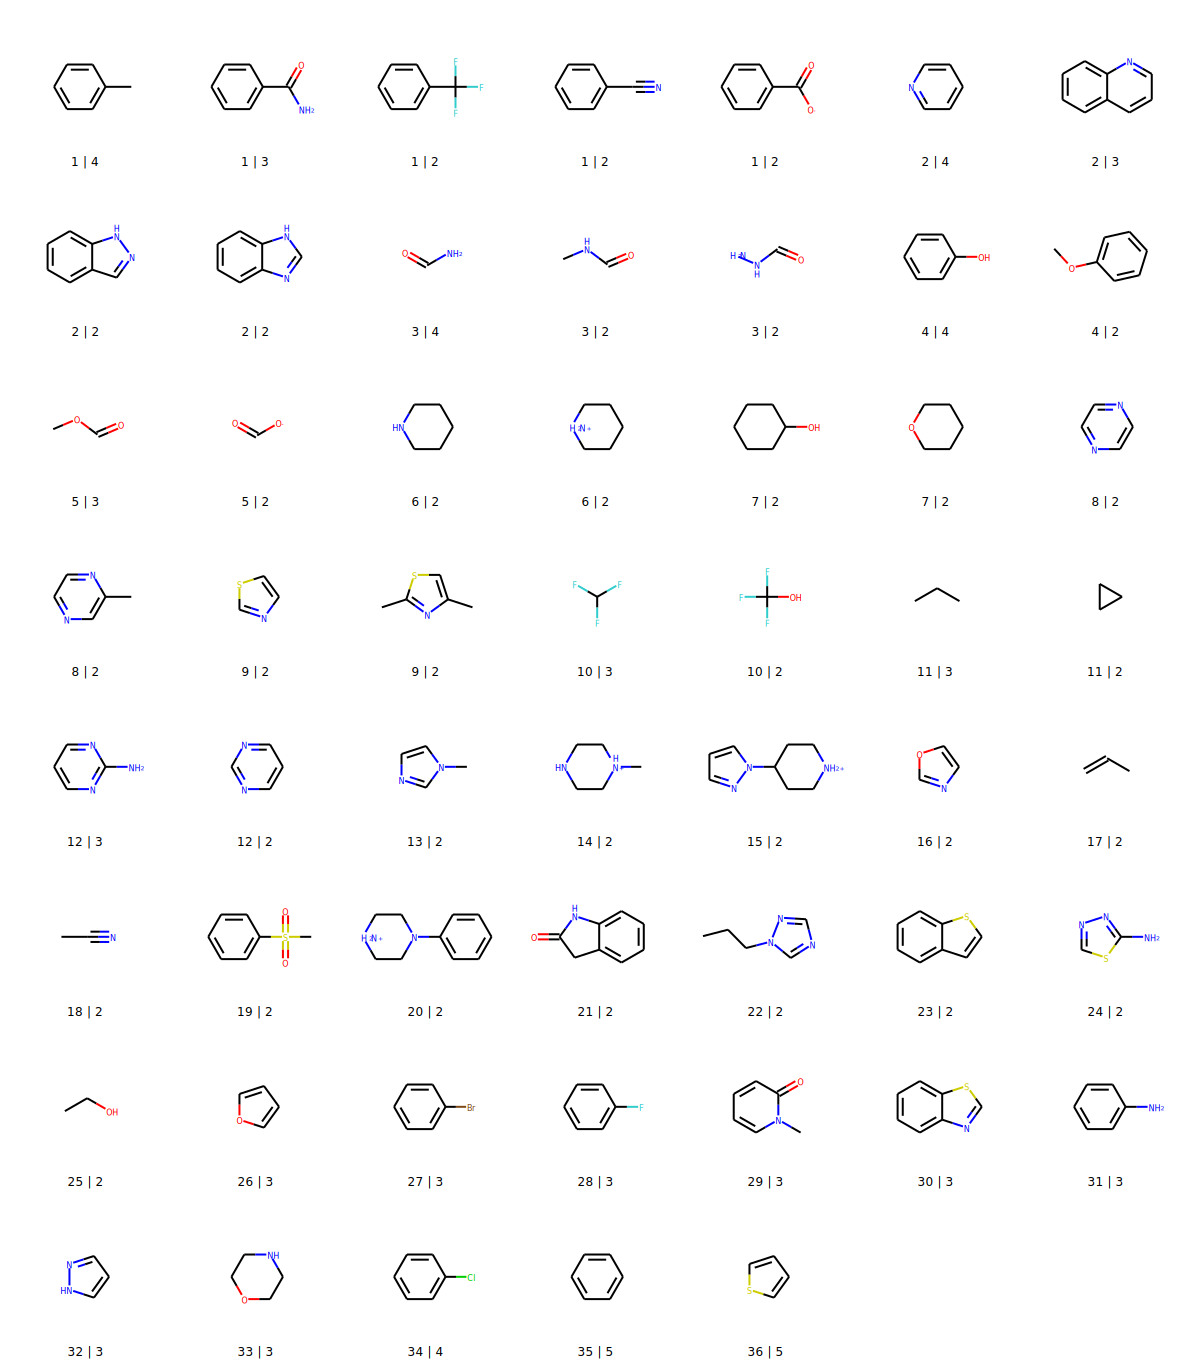

In [22]:
filters.pipeline_analysis.draw_clusters(most_common_fragments_reduced, subpocket, None)

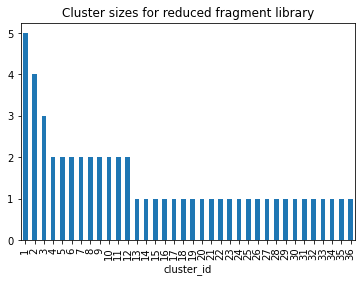

In [23]:
filters.pipeline_analysis.plot_cluster_sizes(most_common_fragments_reduced, subpocket, "reduced fragment library")

### 3.3. Fragment library custom filtered

In [24]:
most_common_fragments_custom = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library_custom, subpocket)

Number of molecules: 62
Threshold:  0.6
Number of clusters:  23
# Clusters with only 1 molecule:  13
# Clusters with more than 5 molecules:  3
# Clusters with more than 25 molecules:  0
# Clusters with more than 100 molecules:  0


Legend: cluster ID | fragment count


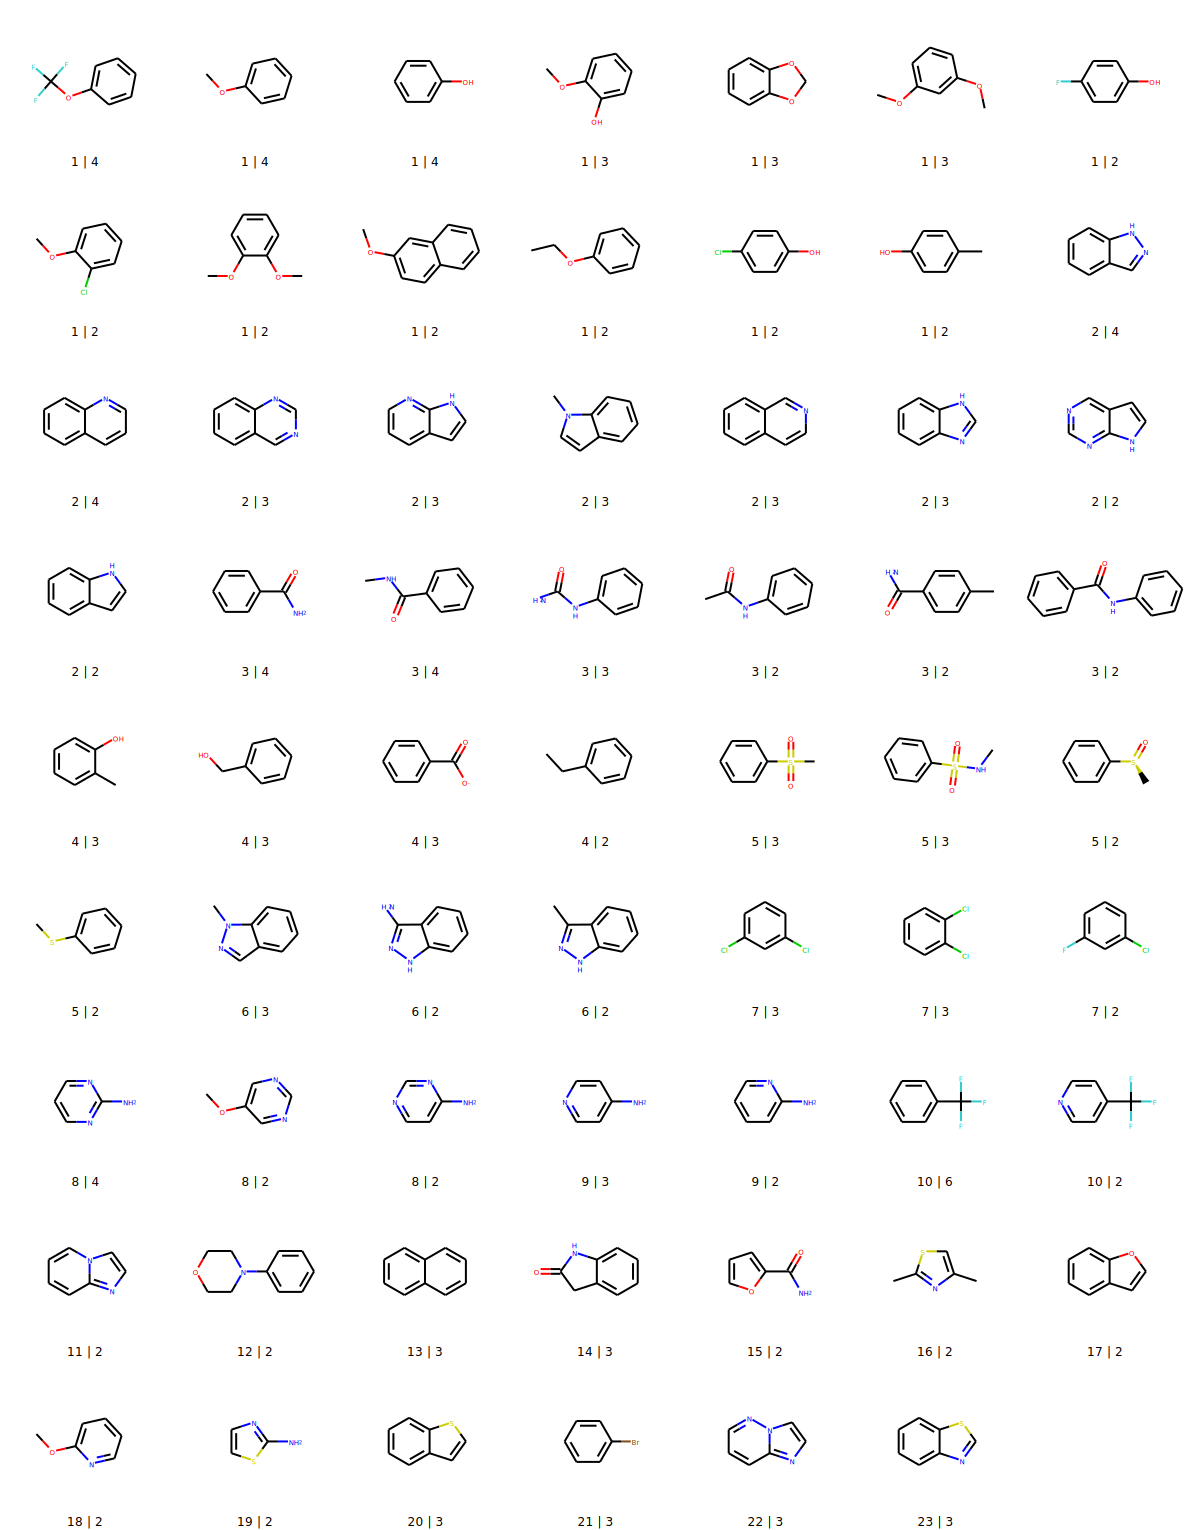

In [25]:
filters.pipeline_analysis.draw_clusters(most_common_fragments_custom, subpocket, None)

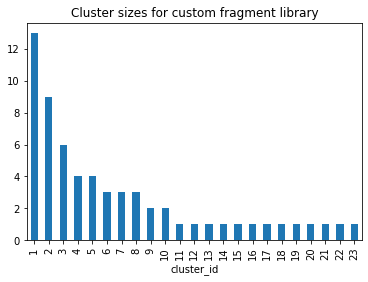

In [26]:
filters.pipeline_analysis.plot_cluster_sizes(most_common_fragments_custom, subpocket, "custom fragment library")

### 3.4. Compare cluster sizes for all subsets

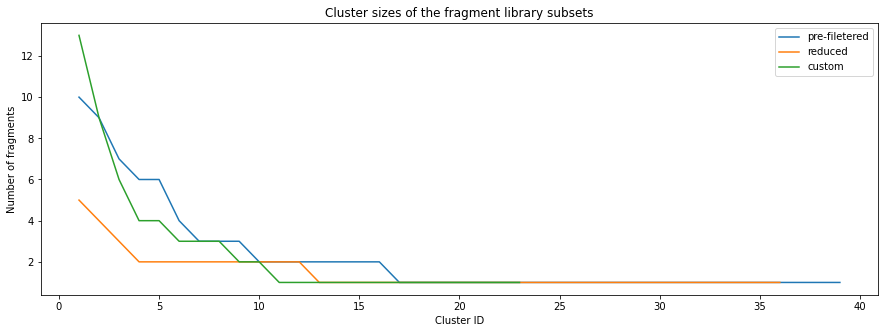

In [27]:
cluster_sizes = pd.DataFrame()
cluster_sizes["pre-filetered"] = most_common_fragments.groupby('cluster_id').size()
cluster_sizes["pre-filetered"].name = 'cluster_size'
cluster_sizes["reduced"] = most_common_fragments_reduced.groupby('cluster_id').size()
cluster_sizes["reduced"].name = "cluster_size"
cluster_sizes["custom"] = most_common_fragments_custom.groupby('cluster_id').size()
cluster_sizes["custom"].name = "cluster_size"

plt = cluster_sizes.plot(
    figsize=(15,5),
    title="Cluster sizes of the fragment library subsets",
    ylabel="Number of fragments",
    xlabel="Cluster ID"
)

## 4. Connection frequecy between subpockets

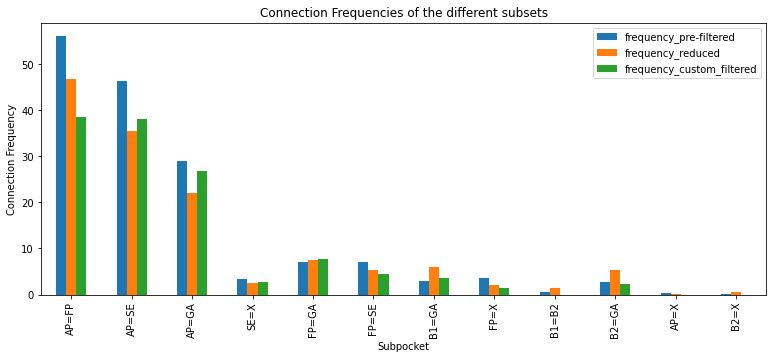

In [28]:
con_frequencies = filters.plots.connection_frequencies(fragment_library, fragment_library_reduced, fragment_library_custom)

In [29]:
con_frequencies

,count_pre-filtered,frequency_pre-filtered,count_reduced,frequency_reduced,count_custom-filtered,frequency_custom_filtered
AP=FP,1026,56.2,254,46.9,140.0,38.5
AP=SE,848,46.4,193,35.6,139.0,38.2
AP=GA,528,28.9,120,22.1,98.0,26.9
SE=X,63,3.4,13,2.4,10.0,2.7
FP=GA,129,7.1,41,7.6,28.0,7.7
FP=SE,128,7.0,29,5.4,16.0,4.4
B1=GA,54,3.0,32,5.9,13.0,3.6
FP=X,68,3.7,11,2.0,5.0,1.4
B1=B2,9,0.5,8,1.5,NaN,NaN
B2=GA,49,2.7,29,5.4,8.0,2.2


## 5. Fragment similarity per subpocket


In [30]:
similarities_per_subpocket = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library))
similarities_per_subpocket_reduced = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library_reduced))
similarities_per_subpocket_custom = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library_custom))
mean_similarities = pd.concat(
    [
        similarities_per_subpocket.groupby('subpocket', sort=False).mean(),
        similarities_per_subpocket_reduced.groupby('subpocket', sort=False).mean(),
        similarities_per_subpocket_custom.groupby('subpocket', sort=False).mean(),
    ],
    axis=1,
)
mean_similarities.columns=["similarity_pre-filtered", "similarity_reduced", "similarity_custom"]
mean_similarities

,similarity_pre-filtered,similarity_reduced,similarity_custom
subpocket,,,
AP,0.140770,0.111311,0.161415
FP,0.089188,0.069282,0.129486
SE,0.102719,0.076425,0.144180
GA,0.104821,0.075186,0.166848
B1,0.074256,0.052510,0.143353
B2,0.091785,0.073320,0.149357


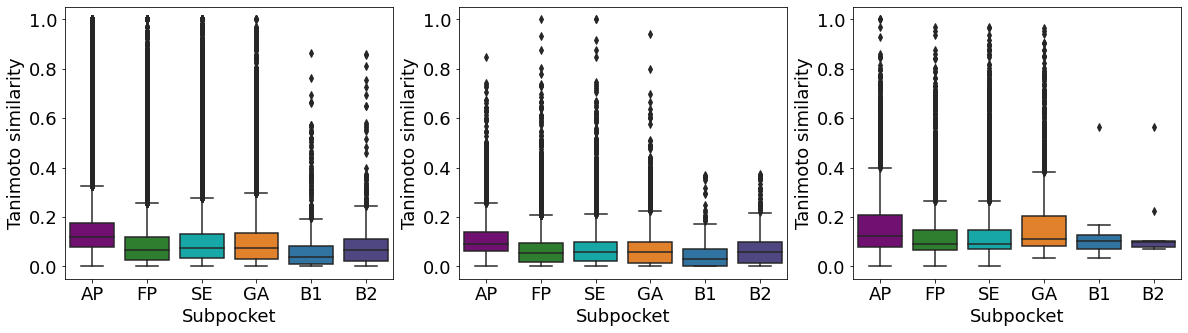

In [31]:
filters.pipeline_analysis.plot_fragment_similarity(
    [similarities_per_subpocket,
     similarities_per_subpocket_reduced,
     similarities_per_subpocket_custom],
    'Subpocket'
)

## 6. Fragment properties 
* 6.1. Per subpocket for each set
* 6.2. Per custom filter

### 6.1. Per subpocket for each set 

pre-filtered


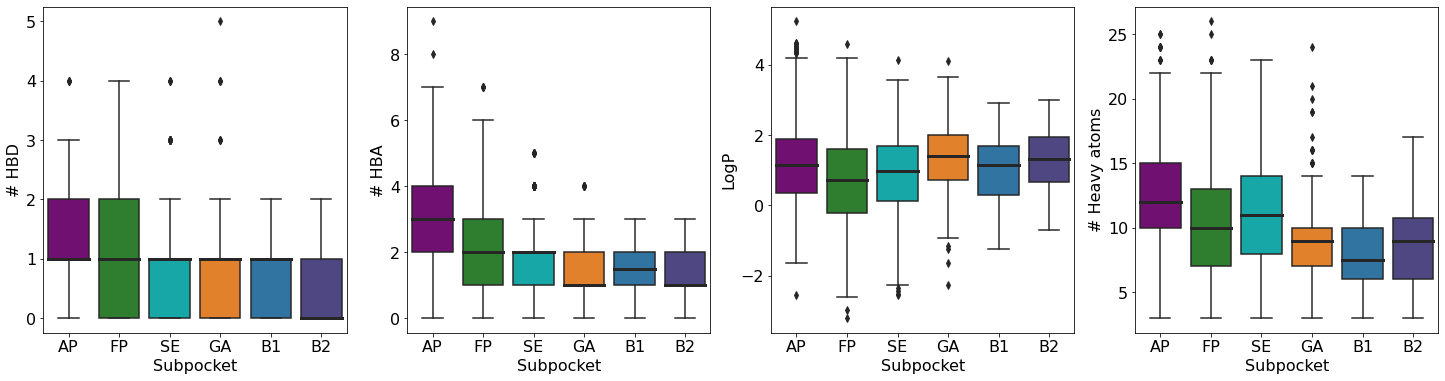

reduced


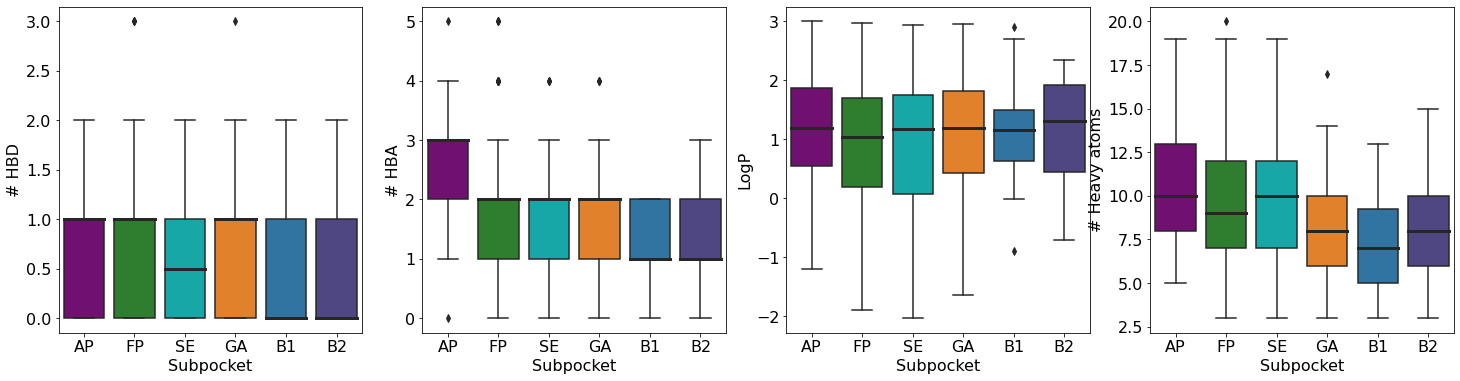

custom


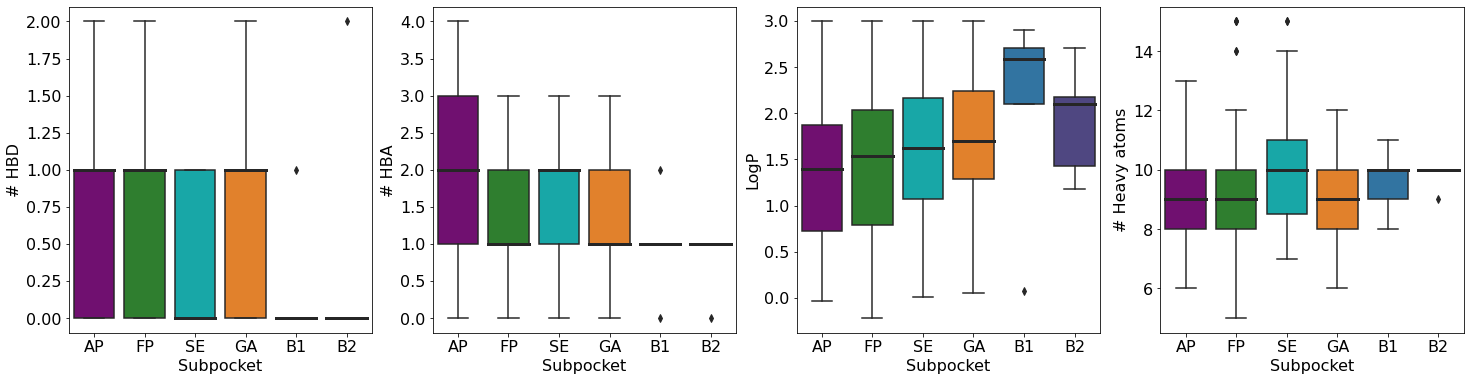

In [32]:
filters.analysis.get_descriptors(fragment_library, fragment_library_reduced, fragment_library_custom)

### 6.2. Per custom filter

In [33]:
filter_results = pd.read_csv(PATH_DATA_CUSTOM / "custom_filter_results.csv")
fragment_library_filter_res, bool_keys = filters.analysis.filter_res_in_fraglib(fragment_library, filter_results)

pre-filtered


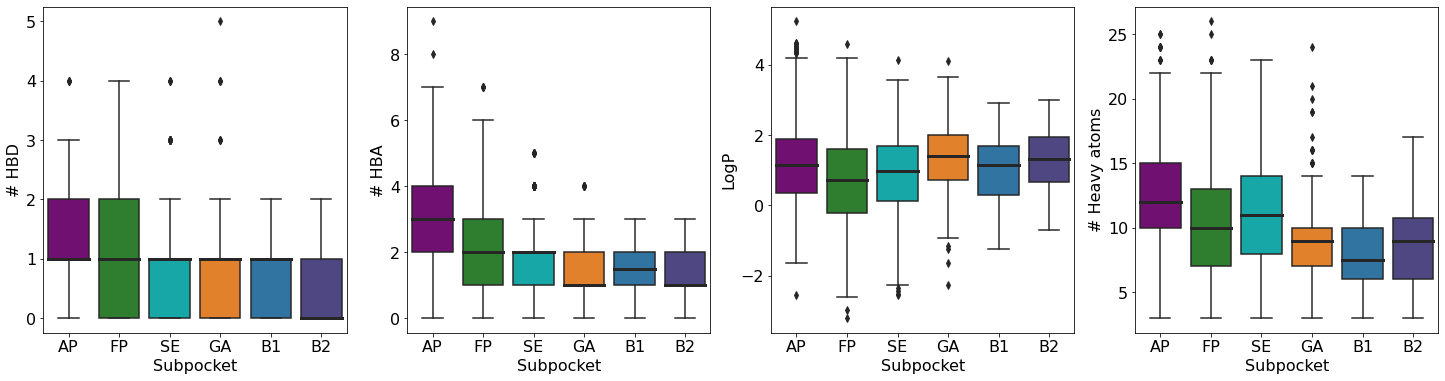

bool_reduced


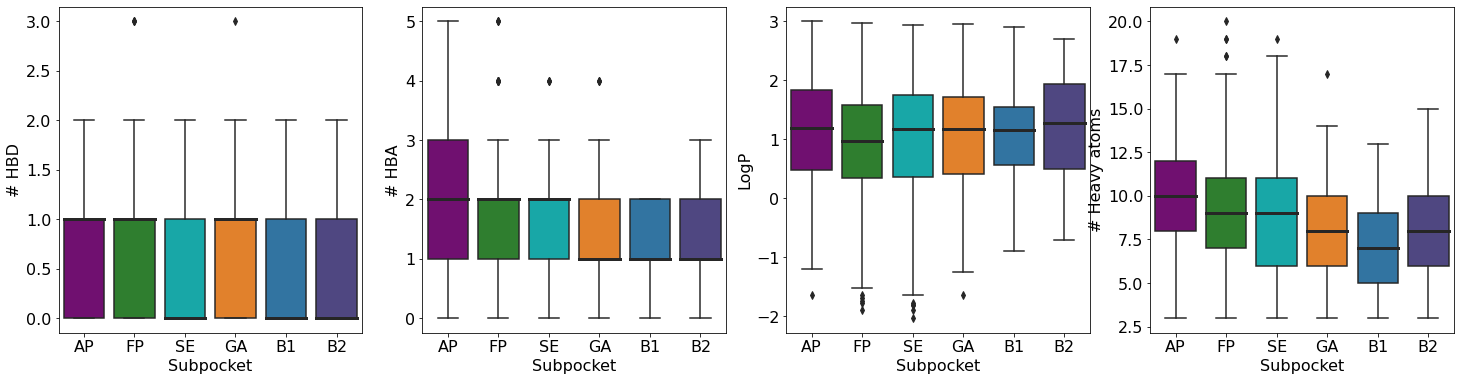

bool_custom


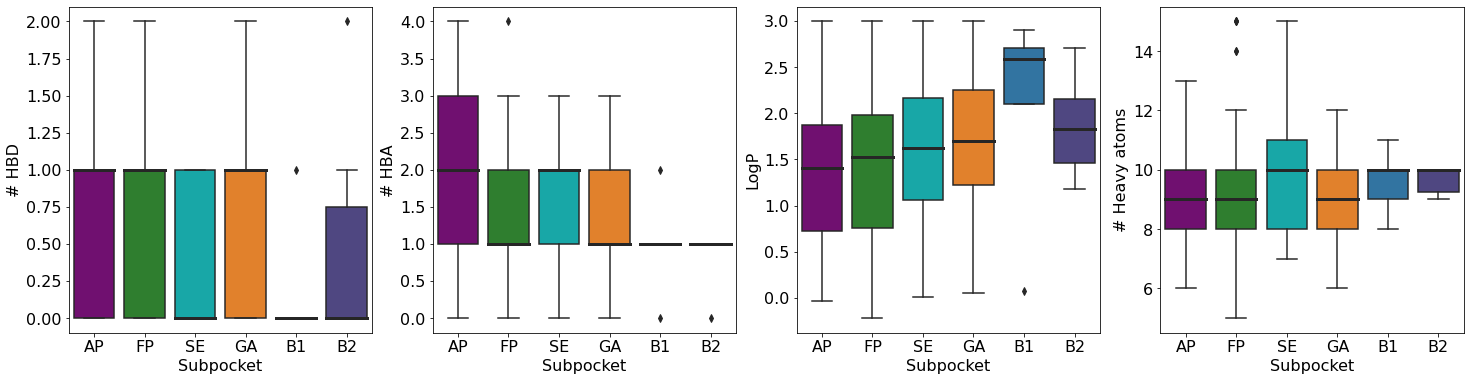

bool_pains


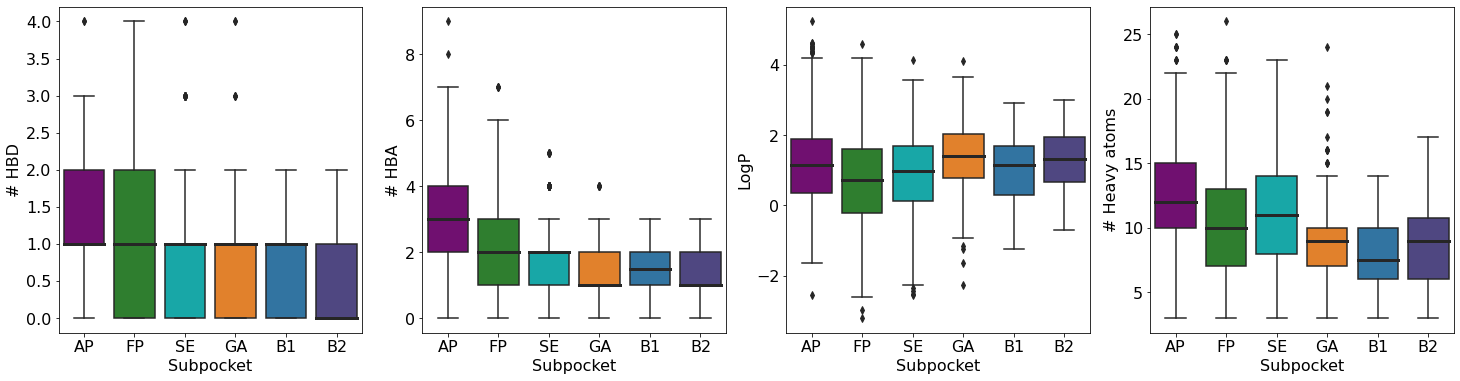

bool_brenk


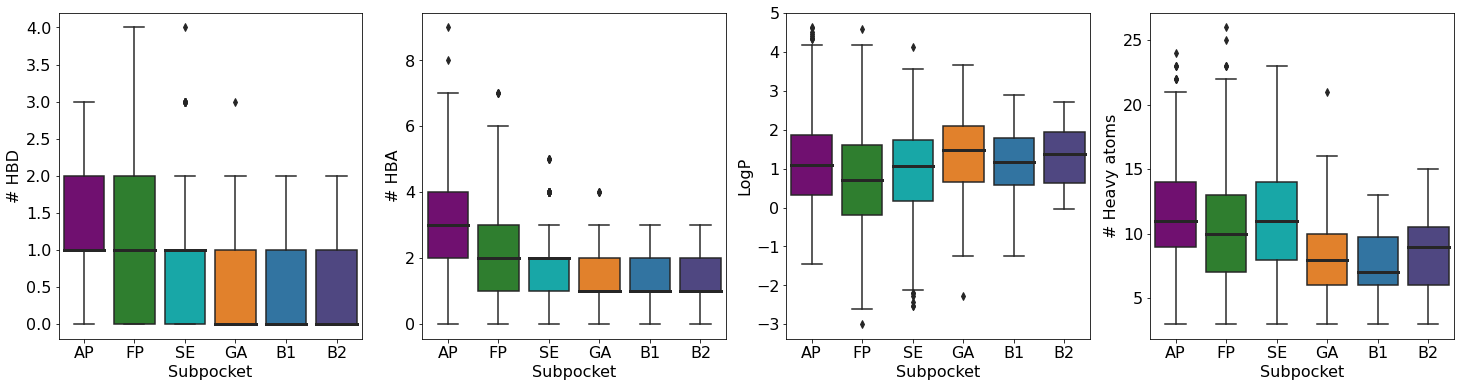

bool_ro3


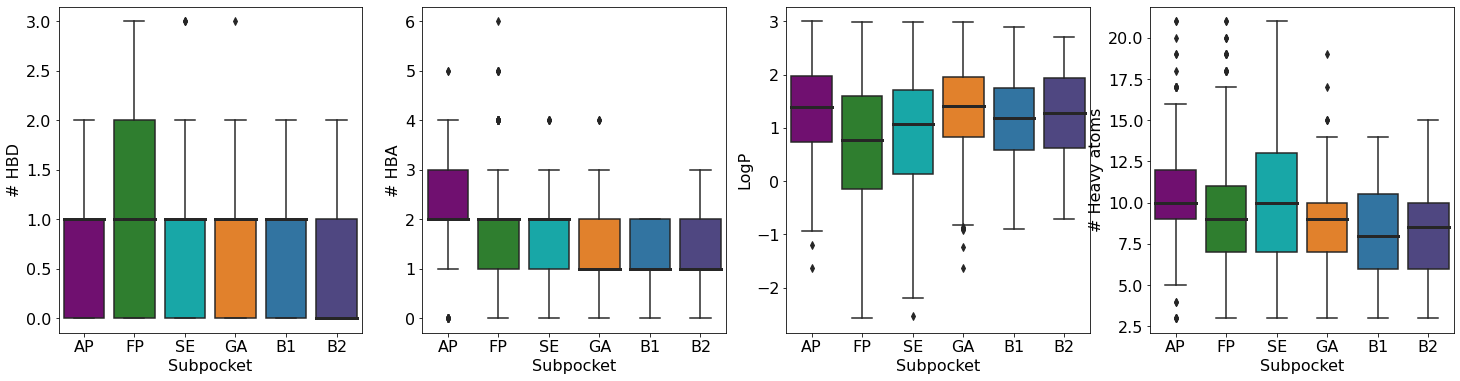

bool_qed


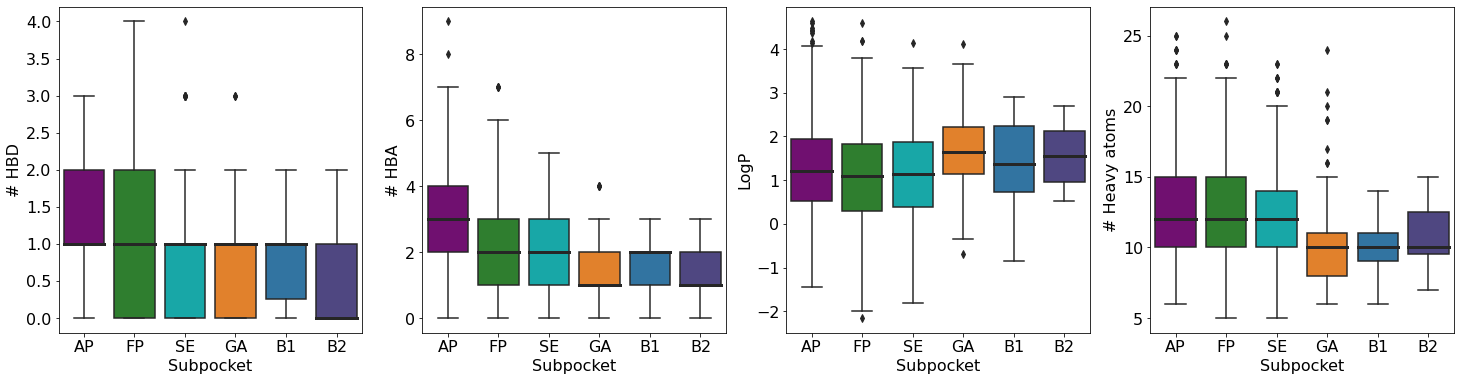

bool_bb


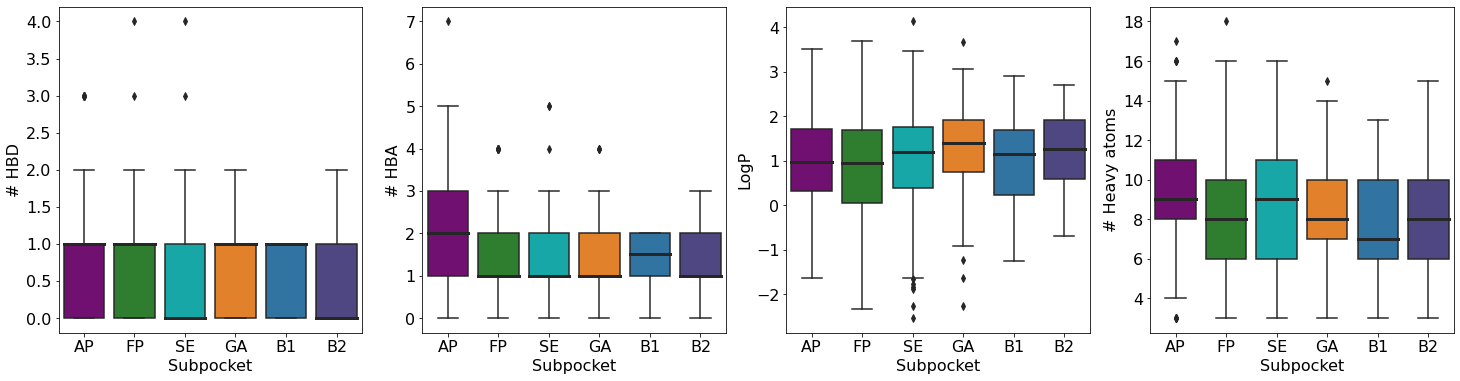

bool_syba


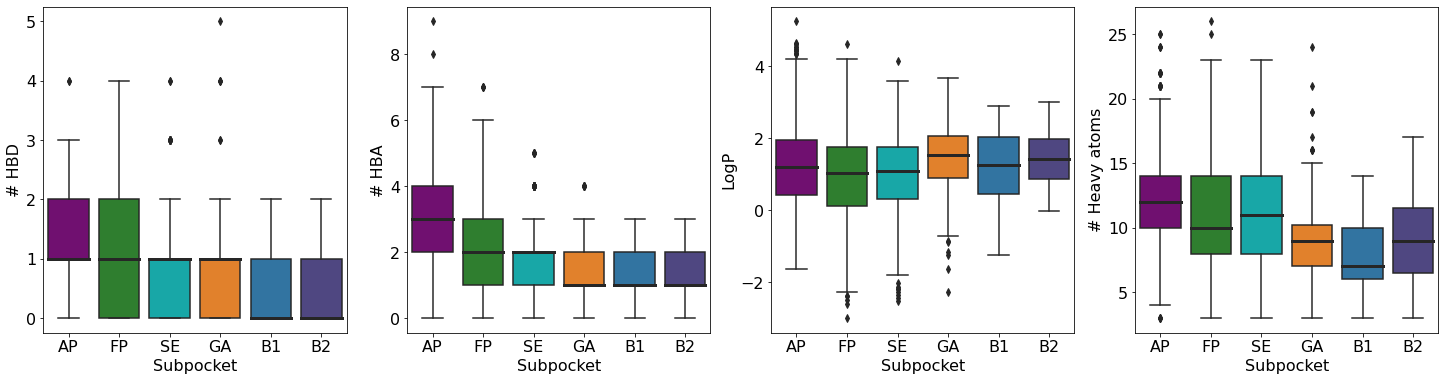

bool_retro


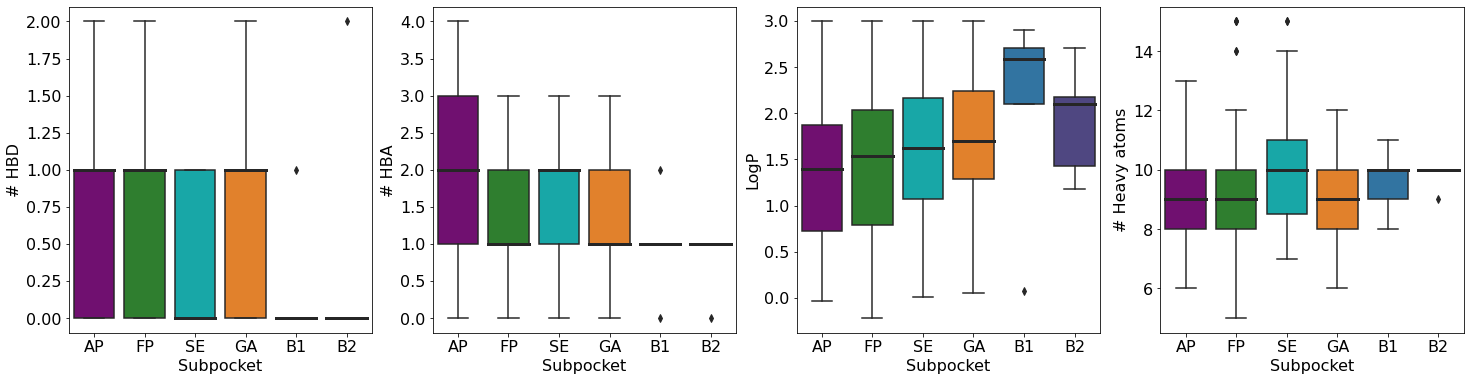

In [34]:
descriptors = filters.analysis.get_descriptors_filters(fragment_library_filter_res, bool_keys)

In [35]:
descriptors.keys()

dict_keys(['pre-filtered', 'bool_reduced', 'bool_custom', 'bool_pains', 'bool_brenk', 'bool_ro3', 'bool_qed', 'bool_bb', 'bool_syba', 'bool_retro'])

## 7. Development of number of fragments per subpocket during custom filtering

Inspect the number of fragments filtered out by each custom filtering step

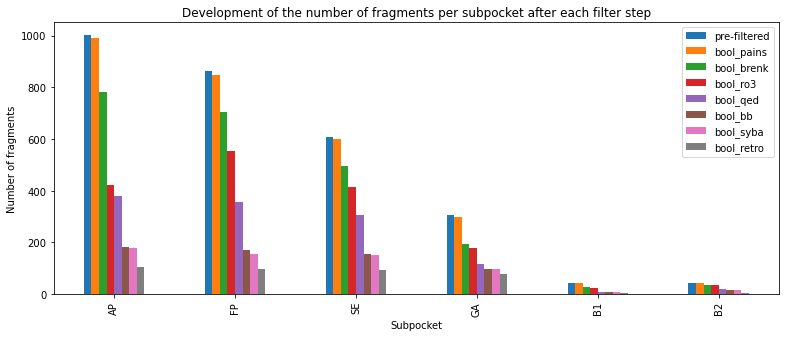

In [36]:
update_results = filters.plots.num_frags_development(filter_results)

In [37]:
update_results

,pre-filtered,bool_pains,bool_brenk,bool_ro3,bool_qed,bool_bb,bool_syba,bool_retro
AP,1001,990,781,422,379,181,179,107
FP,864,847,704,552,357,172,156,97
SE,607,599,495,414,308,154,150,95
GA,306,300,195,179,116,98,96,79
B1,42,42,26,23,10,8,8,5
B2,42,42,36,35,19,18,18,5
